# NFL clustering

This dataset includes receiving characteristics for all NFL players in 2018. The target vector is their Pro Bowl status for that year, but we don't use it in this case.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from yellowbrick.datasets import load_nfl
# Load nfl dataset dataset
X, y = load_nfl()

# Specify the features to use for clustering
# Only consider the players that had over 20 targets
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
X = X.query('Tgt >= 20')[features]
X

,Rec,Yds,TD,Fmb,Ctch_Rate
0,125,1405,9,2,0.850
1,116,1163,8,1,0.744
2,115,1572,11,2,0.706
3,113,1677,8,2,0.665
4,113,1373,9,1,0.739
...,...,...,...,...,...
266,12,164,3,0,0.480
275,11,80,1,0,0.458
277,11,136,1,0,0.478
284,10,100,1,0,0.417


In [3]:
X.describe()

,Rec,Yds,TD,Fmb,Ctch_Rate
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,39.807692,459.207692,2.946154,0.857692,0.669150
std,24.760504,330.028037,2.707951,1.124893,0.107095
min,9.000000,72.000000,0.000000,0.000000,0.362000
25%,21.000000,213.000000,1.000000,0.000000,0.600000
50%,32.500000,334.000000,2.000000,1.000000,0.673000
75%,54.000000,622.000000,4.000000,1.000000,0.739000
max,125.000000,1677.000000,15.000000,7.000000,0.958000


## K-means clustering

The first step is to determine how many clusters to use. We can use the elbow method to determine this.

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

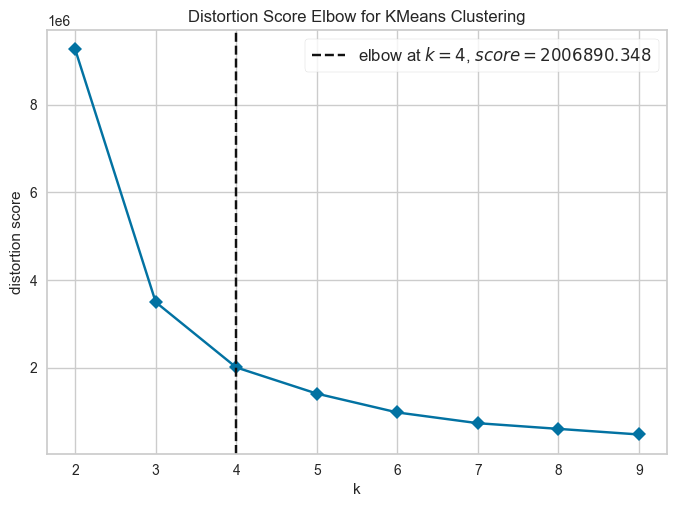

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 timings=False)

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=54), X, k=(2,10), 
                  metric='distortion',
                 timings=False)

In [5]:
X.head()

,Rec,Yds,TD,Fmb,Ctch_Rate
0,125,1405,9,2,0.850
1,116,1163,8,1,0.744
2,115,1572,11,2,0.706
3,113,1677,8,2,0.665
4,113,1373,9,1,0.739


The next step is to implement the clustering method with the number of clusters determined above. Is there any other preprocessing steps that we need to do first?

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled =  pd.DataFrame(scaler.transform(X), columns=X.columns)
X_scaled.head()

,Rec,Yds,TD,Fmb,Ctch_Rate
0,3.447289,2.871321,2.239894,1.017440,1.691943
1,3.083106,2.136636,1.869899,0.126752,0.700260
2,3.042641,3.378314,2.979884,1.017440,0.344750
3,2.961711,3.697083,1.869899,1.017440,-0.038825
4,2.961711,2.774172,2.239894,0.126752,0.653482


In [9]:
kmeans = KMeans(n_clusters=3, random_state=54)
kmeans.fit(X_scaled)

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=54)

In [11]:
X_scaled.columns

Index(['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate'], dtype='object')

In [18]:
X_scaled['clusters'] = kmeans.labels_
X_scaled['clusters'] = X_scaled['clusters'].astype('category') 

In [19]:
# Plot the clusters (separated by color) with their cluster centers
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)


ValueError: Shape of passed values is (3, 5), indices imply (3, 6)

In [13]:
centers

,Rec,Yds,TD,Fmb,Ctch_Rate
0,27.666667,350.086022,2.290323,0.365591,0.568710
1,31.321429,300.098214,1.714286,0.973214,0.748107
2,77.618182,967.727273,6.563636,1.454545,0.678200


ValueError: Could not interpret value `clusters` for parameter `hue`

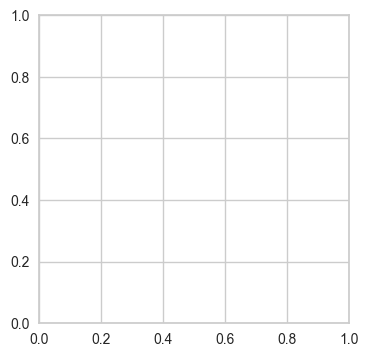

In [17]:
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(x='Rec', y='Yds', hue='clusters', ax=ax, data=centers)

In [ ]:
# Plot a pie chart showing the distribution of data samples for each cluster

**Note:** Clusters are somewhat balanced.

In [ ]:
# Plot the cluster centers for each feature on the standard scale

Based on the cluster distribution, was this the optimal number of clusters? Let's check the elbow method again using silhouette index and calinski-harabasz index.

In [ ]:
# Implement elbow method with silhouette index metric

In [ ]:
# Implement elbow method with calinski_harabasz index metric